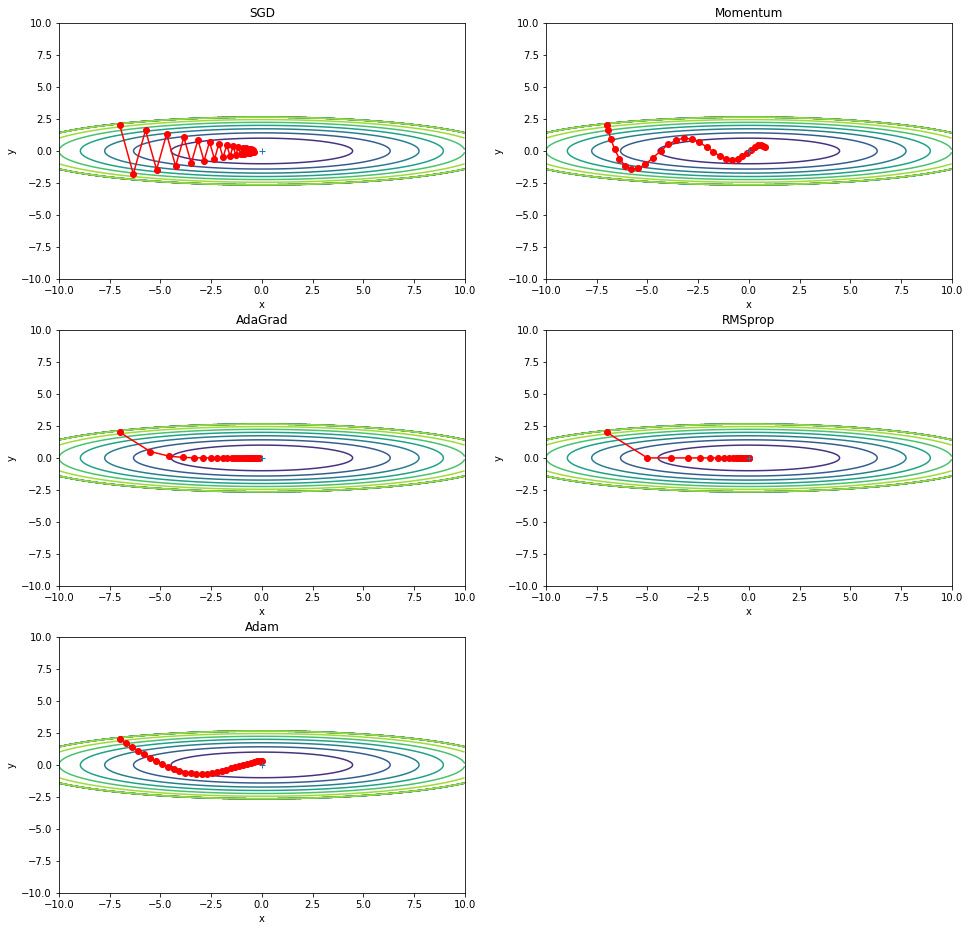

In [9]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

plt.figure(figsize=(16, 16))

# def f(x, y):
#     return x**2  + y**2

# def df(x, y):
#     return 2.0*x , 2.0*y

def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

# init_pos = (2, 2)
# init_pos = (-2.0, 2.0)

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["RMSprop"] = RMSprop(lr=0.2)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(3, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)

#     plt.ylim(-5, 5)
#     plt.xlim(-5, 5)

    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.300992243503601
Momentum:2.3406799445232744
AdaGrad:2.283470328042257
Adam:2.1684491813993523
===========iteration:100===========
SGD:1.2954543945901382
Momentum:0.45443406662600766
AdaGrad:0.24546213352788343
Adam:0.3671986142033399
===========iteration:200===========
SGD:0.751906447241143
Momentum:0.3205795029561216
AdaGrad:0.16328183080780423
Adam:0.2563503530079808
===========iteration:300===========
SGD:0.5541515768173935
Momentum:0.22079204851081152
AdaGrad:0.07919966350444821
Adam:0.1702646271787587
===========iteration:400===========
SGD:0.32639302513367435
Momentum:0.08545663910943438
AdaGrad:0.03135746658695688
Adam:0.05340407864426254
===========iteration:500===========
SGD:0.3488176792281979
Momentum:0.2324788931733956
AdaGrad:0.11544634954308339
Adam:0.16518283037064618
===========iteration:600===========
SGD:0.37306860690745214
Momentum:0.11186705100896795
AdaGrad:0.0642606980944106
Adam:0.09328715015312644
===========iteration:700=

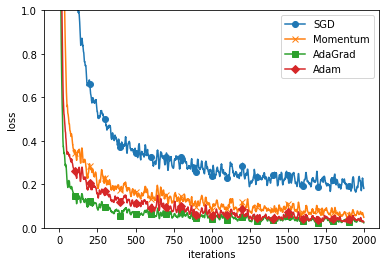

In [10]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

### numpy random 함수

In [14]:
import numpy as np
a = np.random.randn(10000)
# print(a)
print(np.mean(a))
print(np.std(a))

0.011105194105610665
0.9987769960800232


In [18]:
import numpy as np
a = np.random.randn(1000,1000)*0.01
print(np.mean(a))
print(np.std(a))

5.176427329421697e-07
0.009994886222744916


In [21]:
import numpy as np
a = np.random.uniform(low=-1.0, high=1.0, size=(10,10))
print(np.mean(a))
print(np.std(a))

0.04884874550085428
0.5304487252512209


(1000, 100)


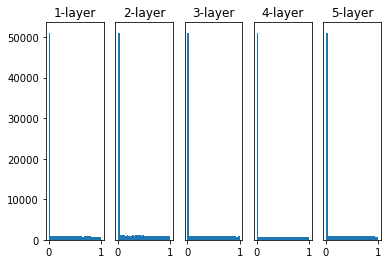

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
print(input_data.shape)
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

# test
#     w = np.random.uniform(low=-2.0, high=2.0, size=(100,100))  * np.sqrt(2.0 / node_num)  

    a = np.dot(x, w)
#     print(a)

    # 활성화 함수도 바꿔가며 실험해보자！
#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [ ]:
def  foo(a,b,c):
    print(a,b,c)
    
foo(a=1,c=2,b=3)

===========iteration:0===========
std=0.01:2.3025353492550167
Xavier:2.2936463683549917
He:2.3364561130262236
===========iteration:100===========
std=0.01:2.3026045881234514
Xavier:2.2573280151698865
He:1.6012899142719115
===========iteration:200===========
std=0.01:2.302625627182595
Xavier:2.147165604691753
He:0.781048448418829
===========iteration:300===========
std=0.01:2.300076092258802
Xavier:1.8631461332406607
He:0.4579912022448269
===========iteration:400===========
std=0.01:2.300001093877741
Xavier:1.3835076616434903
He:0.39034561724631334
===========iteration:500===========
std=0.01:2.3008566109675623
Xavier:1.0111445424674237
He:0.4242080063389435
===========iteration:600===========
std=0.01:2.2988968332645374
Xavier:0.7137093542740344
He:0.39912833456164254
===========iteration:700===========
std=0.01:2.3027575014868793
Xavier:0.6405032998999964
He:0.38041575316783804
===========iteration:800===========
std=0.01:2.306567851152701
Xavier:0.593980068109601
He:0.434102206989242

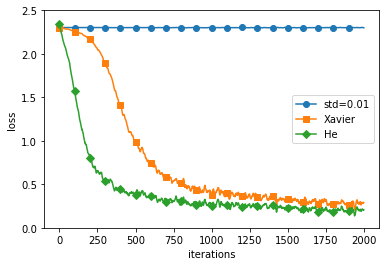

In [27]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

### 배치 정규화 테스트

In [ ]:
x1 = np.array([1000, 3000, 2000, 5000, 7000])
print(x1)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(out)

In [ ]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))

In [ ]:
x1 = np.arange(100000)
mean = np.mean(x1)
out  = (x1 - mean)/np.std(x1)
print(np.mean(out))
print(np.std(out))
gamma = 2
beta = 1
y = out*gamma + beta
print(np.mean(y))
print(np.std(y))

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

plt.figure(figsize=(16, 16))
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

In [ ]:
a = np.logspace(0, -4, num=5, base=2)
a

In [ ]:
a = np.logspace(0, 4, num=5, base=10)
a

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

plt.figure(figsize=(16, 16))

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.10666666666666667, test acc:0.0987
epoch:1, train acc:0.13666666666666666, test acc:0.12
epoch:2, train acc:0.17666666666666667, test acc:0.1427
epoch:3, train acc:0.19333333333333333, test acc:0.1598
epoch:4, train acc:0.24333333333333335, test acc:0.1771
epoch:5, train acc:0.29333333333333333, test acc:0.1959
epoch:6, train acc:0.3333333333333333, test acc:0.2172
epoch:7, train acc:0.36666666666666664, test acc:0.2375
epoch:8, train acc:0.37666666666666665, test acc:0.2499
epoch:9, train acc:0.4033333333333333, test acc:0.2665
epoch:10, train acc:0.43333333333333335, test acc:0.2855
epoch:11, train acc:0.4633333333333333, test acc:0.3074
epoch:12, train acc:0.4633333333333333, test acc:0.3224
epoch:13, train acc:0.4766666666666667, test acc:0.329
epoch:14, train acc:0.5, test acc:0.3426
epoch:15, train acc:0.5, test acc:0.3531
epoch:16, train acc:0.49666666666666665, test acc:0.3602
epoch:17, train acc:0.5066666666666667, test acc:0.3609
epoch:18, train acc:0.486

epoch:158, train acc:0.9133333333333333, test acc:0.722
epoch:159, train acc:0.9166666666666666, test acc:0.7242
epoch:160, train acc:0.91, test acc:0.7229
epoch:161, train acc:0.8933333333333333, test acc:0.7145
epoch:162, train acc:0.9133333333333333, test acc:0.7224
epoch:163, train acc:0.91, test acc:0.7242
epoch:164, train acc:0.9033333333333333, test acc:0.7146
epoch:165, train acc:0.9133333333333333, test acc:0.7231
epoch:166, train acc:0.9133333333333333, test acc:0.7256
epoch:167, train acc:0.9166666666666666, test acc:0.7269
epoch:168, train acc:0.92, test acc:0.7269
epoch:169, train acc:0.92, test acc:0.7217
epoch:170, train acc:0.92, test acc:0.7281
epoch:171, train acc:0.9133333333333333, test acc:0.7224
epoch:172, train acc:0.9133333333333333, test acc:0.7198
epoch:173, train acc:0.9166666666666666, test acc:0.7229
epoch:174, train acc:0.92, test acc:0.7246
epoch:175, train acc:0.9233333333333333, test acc:0.726
epoch:176, train acc:0.91, test acc:0.7192
epoch:177, train 

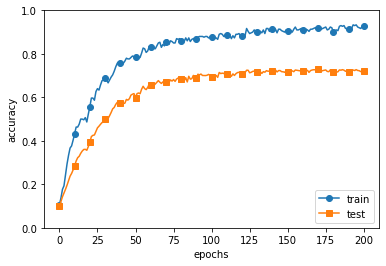

In [2]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
# weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃 테스트

#### tuple 언패킹

In [5]:
a = (1,2)
print(type(a), a)

a,b = (1,2)
print(type(a), a)
print(type(b), b)

<class 'tuple'> (1, 2)
<class 'int'> 1
<class 'int'> 2


In [9]:
def foo():
    return 1,2

c = foo()
print(c)

c,d = foo()
print(c,d)

(1, 2)
1 2


In [13]:
def foo(a):
    print(a)

foo(1)

def foo(a,b):
    print(a,b)

c = (1,2)
foo(*c)

1
1 2


In [27]:
import numpy as np
x = (600,500)
# x = (6,5)
print(x)
print(*x)
a = np.random.rand(*x)  # np.random.rand(6,5)
print(np.mean(a))
print(np.max(a))
print(np.min(a))
# print(a)

(600, 500)
600 500
0.5006371665763919
0.9999987968326233
8.567991783836604e-07


In [55]:
import numpy as np
x = np.arange(1,31).reshape((6,5))
# print(x)
# print(x.shape)
mask = np.random.rand(*x.shape)
# print(mask)
mask = mask > 0.2
# print(mask)
# print(mask.shape)
# print(np.mean(mask))
print(x * mask)

[[ 0  2  0  4  5]
 [ 6  0  0  9  0]
 [11  0 13 14 15]
 [16 17 18  0 20]
 [ 0 22 23 24 25]
 [ 0 27 28 29 30]]


In [ ]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = False  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.398939877207337
=== epoch:1, train acc:0.14333333333333334, test acc:0.1189 ===
train loss:2.30081565897598
train loss:2.355482240358109
train loss:2.2679742813643524
=== epoch:2, train acc:0.16666666666666666, test acc:0.1506 ===
train loss:2.302176897897852
train loss:2.2526911686666606
train loss:2.196828561655896
=== epoch:3, train acc:0.21, test acc:0.1849 ===
train loss:2.1469073008176762
train loss:2.1908419942946376
train loss:2.165272065448829
=== epoch:4, train acc:0.23666666666666666, test acc:0.1935 ===
train loss:2.069726464914109
train loss:2.066821671703692
train loss:2.084580406835128
=== epoch:5, train acc:0.26, test acc:0.2082 ===
train loss:2.1365871728153643
train loss:2.1223621377111375
train loss:2.0745052310920364
=== epoch:6, train acc:0.29, test acc:0.2367 ===
train loss:2.0845602531965315
train loss:2.011545845104479
train loss:2.000850223068004
=== epoch:7, train acc:0.36333333333333334, test acc:0.2883 ===
train loss:2.0181045744532797
train los

=== epoch:58, train acc:0.9566666666666667, test acc:0.7583 ===
train loss:0.2352249276511821
train loss:0.24715012138933504
train loss:0.20419214737838756
=== epoch:59, train acc:0.9666666666666667, test acc:0.7507 ===
train loss:0.21425746359912928
train loss:0.2318102424314822
train loss:0.16179892949772867
=== epoch:60, train acc:0.9733333333333334, test acc:0.7573 ===
train loss:0.19759832877351935
train loss:0.18163494196877564
train loss:0.1593705888745278
=== epoch:61, train acc:0.97, test acc:0.7591 ===
train loss:0.21106344385137163
train loss:0.15028129839347848
train loss:0.18047963956291213
=== epoch:62, train acc:0.9766666666666667, test acc:0.7552 ===
train loss:0.20962041843855805
train loss:0.14897573802549127
train loss:0.1318371253429565
=== epoch:63, train acc:0.9666666666666667, test acc:0.7646 ===
train loss:0.16745192580353138
train loss:0.1501791757170082
train loss:0.1475089046323984
=== epoch:64, train acc:0.98, test acc:0.7639 ===
train loss:0.171010510409605

=== epoch:114, train acc:1.0, test acc:0.7752 ===
train loss:0.04632314108134002
train loss:0.04578285486379732
train loss:0.04587824031914109
=== epoch:115, train acc:1.0, test acc:0.7785 ===
train loss:0.04931373330782666
train loss:0.05306287951520461
train loss:0.03232133590235465
=== epoch:116, train acc:1.0, test acc:0.7772 ===
train loss:0.0413219013985094
train loss:0.036358487260944795
train loss:0.04286373669433283
=== epoch:117, train acc:1.0, test acc:0.7776 ===
train loss:0.04020286948431918
train loss:0.037372164544107564
train loss:0.043970342987555096
=== epoch:118, train acc:1.0, test acc:0.7758 ===
train loss:0.03591621943536271
train loss:0.03516151529510584
train loss:0.03695396491469164
=== epoch:119, train acc:1.0, test acc:0.7772 ===
train loss:0.04182117602796397
train loss:0.038041952365661234
train loss:0.04180968502086358
=== epoch:120, train acc:1.0, test acc:0.7763 ===
train loss:0.03417414324895362
train loss:0.02921589893223186
train loss:0.03235109975579

=== epoch:172, train acc:1.0, test acc:0.7804 ===
train loss:0.020592797645591347
train loss:0.0208141248231711
train loss:0.018421647368131816
=== epoch:173, train acc:1.0, test acc:0.7812 ===
train loss:0.016978287980373742
train loss:0.01366130140124302
train loss:0.021134667042983963
=== epoch:174, train acc:1.0, test acc:0.782 ===
train loss:0.01613568340975845
train loss:0.016267329611742473
train loss:0.016937495279197176
=== epoch:175, train acc:1.0, test acc:0.7825 ===
train loss:0.017782372561785626
train loss:0.015244844706189652
train loss:0.018435783116910142
=== epoch:176, train acc:1.0, test acc:0.7821 ===
train loss:0.015869434521546148
train loss:0.022775587225538785
train loss:0.015587306986333307
=== epoch:177, train acc:1.0, test acc:0.7811 ===
train loss:0.0198289384030612
train loss:0.015417759468878935
train loss:0.02104221155389721
=== epoch:178, train acc:1.0, test acc:0.7808 ===
train loss:0.012993689236767095
train loss:0.013601123058205085
train loss:0.01708

In [ ]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0